# Sprint7 クラスタリング

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import random
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

[[ 1.13280393  3.87673946]
 [-1.74448079  3.84251413]
 [ 0.12313498  5.27917503]]


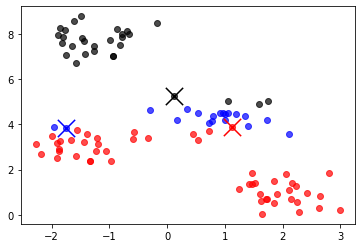

-----
[[ 0.92683572  2.36976669]
 [ 0.92466065  4.36462484]
 [-1.26041884  7.71577043]]


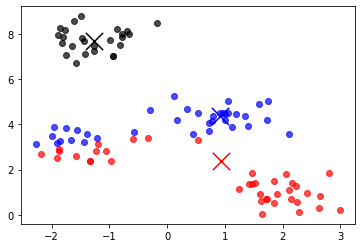

-----
[[ 1.60161834  1.38598318]
 [ 0.62470215  4.11869306]
 [-1.42525273  7.8441996 ]]


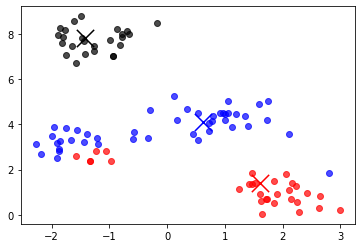

-----
[[ 1.72857189  1.11385656]
 [ 0.3498724   3.84251413]
 [-1.42525273  7.8441996 ]]


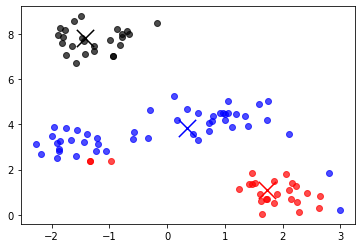

-----
[[ 1.79328225  1.03040673]
 [ 0.16932115  3.71347124]
 [-1.42525273  7.8441996 ]]


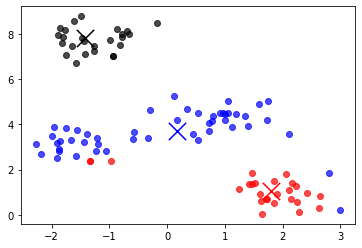

-----


In [209]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.best_clusters_point = None


    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        #問題6
        #初期値の更新
        clusters_default_index, sse_best = self._update_default(X, self.n_clusters)

        #アレイへデフォルト座標格納
        clusters_centers = np.array([])
        
        for i in range(self.n_clusters):
          clusters_centers = np.append(clusters_centers, [X[clusters_default_index[i], :2]])
        clusters_centers = clusters_centers.reshape(self.n_clusters, 2)


        #問題3
        #中心点の更新
        count = 0

        X_split = np.zeros(len(X)).reshape(-1,1)
        X = np.concatenate((X, X_split), axis=1)
        
        while True:
          if count  >= self.max_iter:
            break

          if count != 0:
            if euclidean_distance < self.tol:
              break

            #各クラスターの平均点計算、中心点アレイの更新
            for i in range(self.n_clusters):
              clusters_centers[i] = np.median(X[:,0][X[:,2] == i]), np.median(X[:,1][X[:,2] == i])
              # clusters_centers[i] = np.mean(X[:,:][X[:,2] == i])

          for i in range(len(X)):
            min_value = 100000000
            min_value_cluster = 0

            for v in range(self.n_clusters):
              center_point = clusters_centers[v]
              calced_point = X[i, :2]

              euclidean_distance = np.square(np.linalg.norm(calced_point) -  np.linalg.norm(center_point))

              if euclidean_distance < min_value:
                min_value = euclidean_distance
                min_value_cluster = v

              X[i, 2] = min_value_cluster

          count += 1

          print(clusters_centers)
          plt.scatter(X[:,0][X[:,2] == 0], X[:,1][X[:,2] == 0], color ='red', alpha=0.7)
          plt.scatter(X[:,0][X[:,2] == 1], X[:,1][X[:,2] == 1], color ='blue', alpha=0.7)
          plt.scatter(X[:,0][X[:,2] == 2], X[:,1][X[:,2] == 2], color ='black', alpha=0.7)

          plt.scatter(clusters_centers[0,0], clusters_centers[0,1], color ='red', marker='x', s=300)
          plt.scatter(clusters_centers[1,0], clusters_centers[1,1], color ='blue', marker='x', s=300)
          plt.scatter(clusters_centers[2,0], clusters_centers[2,1], color ='black', marker='x', s=300)
          plt.show()
          print('-----')

        self.best_clusters_point = clusters_centers


    #問題6
    #初期値の更新
    def _update_default(self, X, clusters):
        #クラスターごとのsseを集計、リストへ格納
        
        #クラスター番号カラム作成、Xへ結合
        X_split = np.zeros(len(X)).reshape(-1,1)
        X = np.concatenate((X, X_split), axis=1)

        for i in range(self.n_init):
          sse_best = 0

          #問題1
          #ランダムで初期値取得
          clusters_default_index_temp = [i for i in random.sample(range( len(X) ), k=clusters)]

          #サンプルごとの最寄り中心点を取得
          for z in range(len(X)):
            nearest_distance = 100000000
            for m in range(len(clusters_default_index_temp)):
              current_distance = abs(np.linalg.norm(X[z, :2]) -  np.linalg.norm(X[clusters_default_index_temp[m], :2]))
              if current_distance < nearest_distance:
                nearest_distance = current_distance
                X[z,2] = clusters_default_index_temp[m]
            

          #sse計算
          sse = self._calc_sse(X)

          #既存値と更新値を比較し、更新値が優れていればXのbest_sseと、Xのインデックスを更新
          if sse_best == 0:
            sse_best = sse
            clusters_default_index = clusters_default_index_temp
          else:
            if sse < sse_best:
              sse_best = sse
              clusters_default_index = clusters_default_index_temp
          
        return clusters_default_index, sse_best


    #問題2
    def _calc_sse(self, X):
        """
        クラスタ内誤差平方和 (SSE) の計算
        ---
        引数
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        ---
        戻り値
        sse：
        　　　　　　　クラスタ内誤差平方和 (SSE)
        """
        sse = 0

        for i in range(len(X)):
          idx = int(X[i, 2]) 
          sse += np.sum( (X[i, :2] - X[idx, :2]) ** 2)
        return sse


    #問題8
    def _elbow(self, X):
        count = 0
        self.sse_list = []

        while True:
          if count  > 10:
            break

          clusters_in_elbow = count + 1      
          clusters_default_index, sse_best = self._update_default(X, clusters_in_elbow)

          self.sse_list.append(sse_best)

          count += 1


        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        Y_pred = np.array([])

        for i in range(X.shape[0]):
          temp_class = 0
          diff = abs(np.linalg.norm(X[i, :2]) -  np.linalg.norm(self.best_clusters_point[0]))

          for v in range(self.best_clusters_point.shape[0] - 1):
            if diff > abs(np.linalg.norm(X[i, :2]) -  np.linalg.norm(self.best_clusters_point[v+1])):
              diff = abs(np.linalg.norm(X[i, :2]) -  np.linalg.norm(self.best_clusters_point[v+1]))
              temp_class = v+1
          
          Y_pred = np.append(Y_pred, temp_class)

        return Y_pred

n_clusters = 3
n_init = 5
max_iter = 5
tol = 0.001

a = ScratchKMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol)
a.fit(X)

# 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [ ]:
#上方クラスへ実装済み

# 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。


\[SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2\]
$n$ : データ点のインデックス


$k$ : クラスタのインデックス


$X_n$ : $n$番目のデータ点


$\mu_k$ : $k$番目の中心点


$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0

In [ ]:
#上方クラスへ実装済み

# 【問題3】クラスタへの割り当て
すべてのデータ点 $X_n$ を最も近い中心点 $\mu_k$ に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。


\[\|q-p\| = \sqrt{(q-p)\cdot(q-p)}\]
NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。

In [ ]:
#上方クラスへ実装済み

# 【問題4】中心点の移動
中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられるすべてのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [ ]:
#上方クラスへ実装済み

# 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


1.   繰り返しが指定した回数に到達する。（雛形では引数max_iter）
2.   中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

In [ ]:
#上方クラスへ実装済み

# 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。

In [ ]:
#上方クラスへ実装済み

# 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


*   データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。
*   データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

In [210]:
Y_pred = a.predict(X)
Y_pred

array([1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 0.,
       1., 1., 0., 1., 2., 1., 0., 1., 1., 1., 1., 1., 0., 0., 2., 0., 0.,
       1., 1., 2., 0., 2., 1., 1., 1., 2., 1., 1., 2., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 2., 2., 0., 0., 2., 2., 0., 0., 1., 0., 2., 1., 0.,
       0., 1., 2., 0., 1., 2., 1., 1., 1., 1., 0., 0., 0., 2., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 2., 2., 1., 2., 1.])

# 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

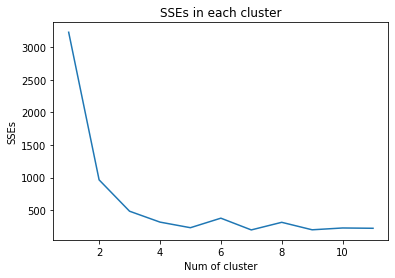

In [212]:
a._elbow(X)

plt.title('SSEs in each cluster')
plt.xlabel('Num of cluster')
plt.ylabel('SSEs')
plt.plot(list(range(1,12)), a.sse_list)

plt.show()

# 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


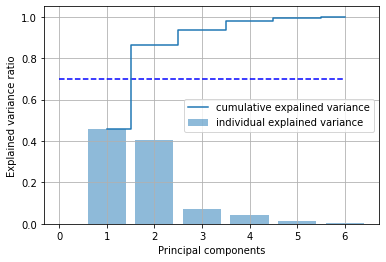

In [80]:
csv_path = "/content/sample_data/Wholesale customers data.csv" 

np.set_printoptions(suppress=True)
data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

data_dropped = np.delete(data, [0, 1], 1)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=None)
pca = pca.fit(data_dropped)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

[[12119. 28326.]
 [ 8656.  2746.]
 [ 3366.  2884.]
 [11908.  8053.]
 [ 5417.  9933.]]


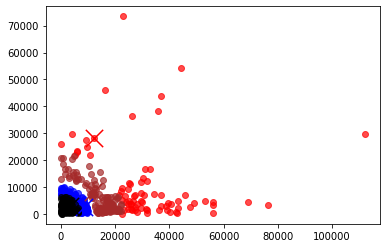

-----
[[29580.5  4984.5]
 [ 6988.5  3880. ]
 [ 2599.   2160. ]
 [15218.   4257. ]
 [10347.5  4230.5]]


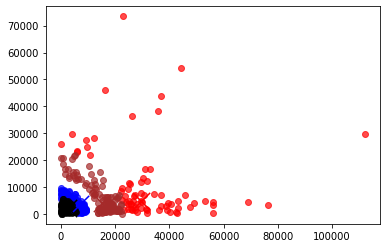

-----
[[29703.   4959. ]
 [ 5858.5  4220. ]
 [ 2111.   1841. ]
 [15776.   4268.5]
 [ 9670.   3783. ]]


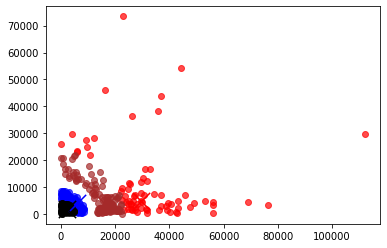

-----
[[29703.   4959. ]
 [ 4983.   4560. ]
 [ 1912.5  1610. ]
 [15643.   4268.5]
 [ 9198.   3708.5]]


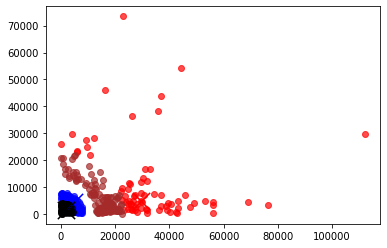

-----
[[29703.   4959. ]
 [ 4760.   3880. ]
 [ 1774.   1703. ]
 [15587.   4257. ]
 [ 8598.5  3837.5]]


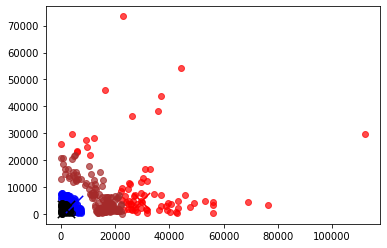

-----


In [81]:
n_clusters = 5
n_init = 5
max_iter = 5
tol = 0.001

whole_sale = ScratchKMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol)
whole_sale.fit(data_dropped)

In [82]:
whole_sale._elbow(data_dropped)
whole_sale.sse_list

[249235769930.0,
 72184343169.0,
 135924832563.0,
 75118447065.0,
 100141914842.0,
 63065605336.0,
 77122695098.0,
 59638662990.0,
 51383119387.0,
 46157908203.0,
 57220471982.0]

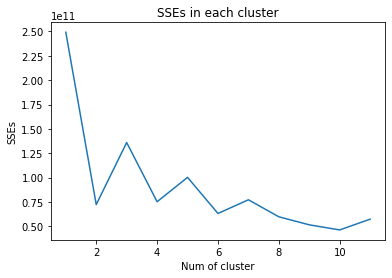

In [83]:
plt.title('SSEs in each cluster')
plt.xlabel('Num of cluster')
plt.ylabel('SSEs')
plt.plot(list(range(1,12)), whole_sale.sse_list)

plt.show()

#クラスタ数は6つが最適と思われる

# 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [84]:
# data = np.concatenate((data, Y_pred), axis=1)

Y_pred = whole_sale.predict(data_dropped).reshape(-1,1)
data = np.concatenate((data, Y_pred), axis=1)

In [91]:
data = pd.DataFrame(data)
data = data.set_axis(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Class'], axis='columns')

3      3.0
8      1.0
15     4.0
17     4.0
19     4.0
      ... 
434    3.0
435    0.0
436    0.0
438    4.0
439    2.0
Name: Class, Length: 298, dtype: float64

In [95]:
def plt_pie(x, title):
  print(f'----------{ title }----------')
  label = x.value_counts(ascending=False, normalize=False).index
  vals = x.value_counts(ascending=False, normalize=False).values

  plt.pie(vals, labels=label,autopct="%1.1f%%",startangle=90 ,counterclock=False)
  plt.axis('equal')
  plt.show()

----------Channel 1----------


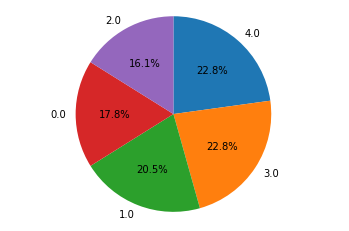

----------Channel 2----------


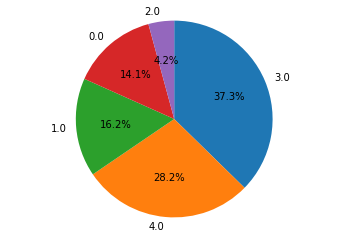

In [98]:
plt_pie(data[data['Channel'] == 1]['Class'], 'Channel 1')
plt_pie(data[data['Channel'] == 2]['Class'], 'Channel 2')

----------Regiion 1----------


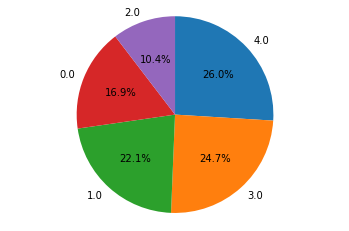

----------Regiion 2----------


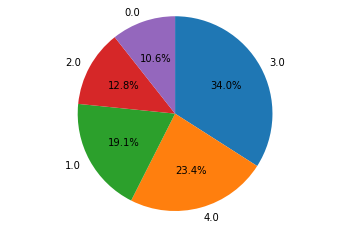

----------Regiion 3----------


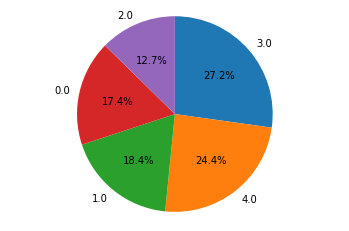

In [104]:
plt_pie(data[data['Region'] == 1]['Class'], 'Regiion 1')
plt_pie(data[data['Region'] == 2]['Class'], 'Regiion 2')
plt_pie(data[data['Region'] == 3]['Class'], 'Regiion 3')

In [101]:
#既存クラスとの相違点,特徴について
#Channel 2に　クラス2が少ない
#Channel 2に　クラス3が多い。またクラス3,4の割合が高く、全体の7割程度を占める
#Region 2に クラス3が多い

count    440.000000
mean       2.543182
std        0.774272
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Region, dtype: float64

# 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。

In [ ]:
#クラス0は優秀、そしてFreshの平均単価が著しく高い
#クラス3はGroceryの平均単価が高い
#クラス2各商品の平均単価が著しく低い
#クラス0は全体的に優秀であるがGroceryの平均単価がクラス3に比べて低い
#クラス4は母数は多いが、売り上げ、単価などは低調


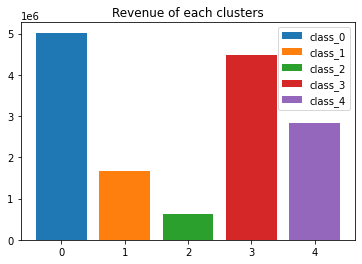

In [196]:
class_0 = data[data['Class'] == 0][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum().sum()
class_1 = data[data['Class'] == 1][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum().sum()
class_2 = data[data['Class'] == 2][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum().sum()
class_3 = data[data['Class'] == 3][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum().sum()
class_4 = data[data['Class'] == 4][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum().sum()

x =[0,1,2,3,4]

plt.title('Revenue of each clusters')

plt.bar('0', class_0, label='class_0')
plt.bar('1', class_1, label='class_1')
plt.bar('2', class_2, label='class_2')
plt.bar('3', class_3, label='class_3')
plt.bar('4', class_4, label='class_4')
plt.legend()

plt.show()

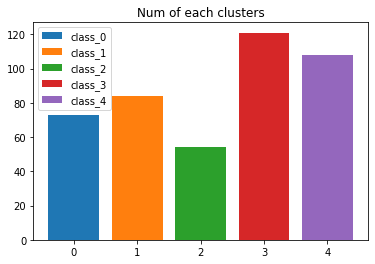

73

In [204]:
plt.title('Num of each clusters')

plt.bar('0', data[data['Class'] == 0]['Class'].count(), label='class_0')
plt.bar('1', data[data['Class'] == 1]['Class'].count(), label='class_1')
plt.bar('2', data[data['Class'] == 2]['Class'].count(), label='class_2')
plt.bar('3', data[data['Class'] == 3]['Class'].count(), label='class_3')
plt.bar('4', data[data['Class'] == 4]['Class'].count(), label='class_4')
plt.legend()

plt.show()
data[data['Class'] == 0]['Class'].count()

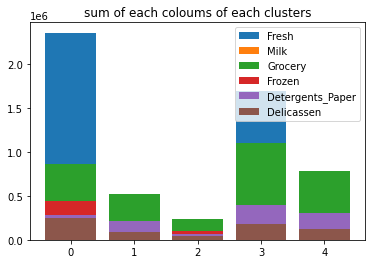

In [195]:
Fresh = [data[data['Class'] == 0]['Fresh'].sum(), data[data['Class'] == 1]['Fresh'].sum(), data[data['Class'] == 2]['Fresh'].sum(), data[data['Class'] == 3]['Fresh'].sum(), data[data['Class'] == 4]['Fresh'].sum()]
Milk = [data[data['Class'] == 0]['Milk'].sum(), data[data['Class'] == 1]['Milk'].sum(), data[data['Class'] == 2]['Milk'].sum(), data[data['Class'] == 3]['Milk'].sum(), data[data['Class'] == 4]['Milk'].sum()]
Grocery = [data[data['Class'] == 0]['Grocery'].sum(), data[data['Class'] == 1]['Grocery'].sum(), data[data['Class'] == 2]['Grocery'].sum(), data[data['Class'] == 3]['Grocery'].sum(), data[data['Class'] == 4]['Grocery'].sum()]
Frozen = [data[data['Class'] == 0]['Frozen'].sum(), data[data['Class'] == 1]['Frozen'].sum(), data[data['Class'] == 2]['Frozen'].sum(), data[data['Class'] == 3]['Frozen'].sum(), data[data['Class'] == 4]['Frozen'].sum()]
Detergents_Paper = [data[data['Class'] == 0]['Detergents_Paper'].sum(), data[data['Class'] == 1]['Detergents_Paper'].sum(), data[data['Class'] == 2]['Detergents_Paper'].sum(), data[data['Class'] == 3]['Detergents_Paper'].sum(), data[data['Class'] == 4]['Detergents_Paper'].sum()]
Delicassen = [data[data['Class'] == 0]['Delicassen'].sum(), data[data['Class'] == 1]['Delicassen'].sum(), data[data['Class'] == 2]['Delicassen'].sum(), data[data['Class'] == 3]['Delicassen'].sum(), data[data['Class'] == 4]['Delicassen'].sum()]

x =[0,1,2,3,4]

plt.title('sum of each coloums of each clusters')

plt.bar(x, Fresh, label='Fresh')
plt.bar(x, Milk, label='Milk')
plt.bar(x, Grocery, label='Grocery')
plt.bar(x, Frozen, label='Frozen')
plt.bar(x, Detergents_Paper, label='Detergents_Paper')
plt.bar(x, Delicassen, label='Delicassen')
plt.legend()

plt.show()

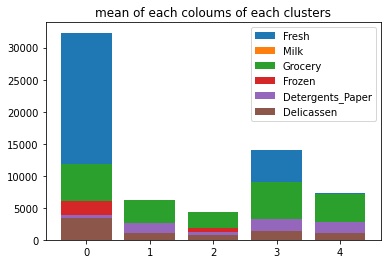

In [194]:
Fresh = [data[data['Class'] == 0]['Fresh'].mean(), data[data['Class'] == 1]['Fresh'].mean(), data[data['Class'] == 2]['Fresh'].mean(), data[data['Class'] == 3]['Fresh'].mean(), data[data['Class'] == 4]['Fresh'].mean()]
Milk = [data[data['Class'] == 0]['Milk'].mean(), data[data['Class'] == 1]['Milk'].mean(), data[data['Class'] == 2]['Milk'].mean(), data[data['Class'] == 3]['Milk'].mean(), data[data['Class'] == 4]['Milk'].mean()]
Grocery = [data[data['Class'] == 0]['Grocery'].mean(), data[data['Class'] == 1]['Grocery'].mean(), data[data['Class'] == 2]['Grocery'].mean(), data[data['Class'] == 3]['Grocery'].mean(), data[data['Class'] == 4]['Grocery'].mean()]
Frozen = [data[data['Class'] == 0]['Frozen'].mean(), data[data['Class'] == 1]['Frozen'].mean(), data[data['Class'] == 2]['Frozen'].mean(), data[data['Class'] == 3]['Frozen'].mean(), data[data['Class'] == 4]['Frozen'].mean()]
Detergents_Paper = [data[data['Class'] == 0]['Detergents_Paper'].mean(), data[data['Class'] == 1]['Detergents_Paper'].mean(), data[data['Class'] == 2]['Detergents_Paper'].mean(), data[data['Class'] == 3]['Detergents_Paper'].mean(), data[data['Class'] == 4]['Detergents_Paper'].mean()]
Delicassen = [data[data['Class'] == 0]['Delicassen'].mean(), data[data['Class'] == 1]['Delicassen'].mean(), data[data['Class'] == 2]['Delicassen'].mean(), data[data['Class'] == 3]['Delicassen'].mean(), data[data['Class'] == 4]['Delicassen'].mean()]

x =[0,1,2,3,4]

plt.title('mean of each coloums of each clusters')

plt.bar(x, Fresh, label='Fresh')
plt.bar(x, Milk, label='Milk')
plt.bar(x, Grocery, label='Grocery')
plt.bar(x, Frozen, label='Frozen')
plt.bar(x, Detergents_Paper, label='Detergents_Paper')
plt.bar(x, Delicassen, label='Delicassen')
plt.legend()

plt.show()